# Show effectiveness of windowing for reducing leakage

In [1]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift, ifft
from scipy.signal import blackman

plt.rcParams['figure.figsize'] = [8, 5.0]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.grid'] = True

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def nicegrid(ax=plt):
    ax.grid(True, which='major', color='#666666', linestyle=':')
    ax.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
    ax.minorticks_on()

## Create some data from a multi-sine signal

In [2]:
# Number of sample points
N = 2048

fs = 500 # sample freq
Ts = 1/fs # sample period
w1 = 50*2*np.pi
w2 = 75*2*np.pi
w3 = 100*2*np.pi

t = np.linspace(0.0, N*Ts, N, endpoint=False)
y = np.sin(w1*t) - 0.5*np.sin(w2*t) + 0.25*np.sin(w3*t)

## Do FFT to find freq plot from the N data points

In [3]:
Yf = fft(y)
xf = fftfreq(N, 1/fs)
xf_plot = fftshift(xf)
Yf_plot = 1.0/N * fftshift(Yf)

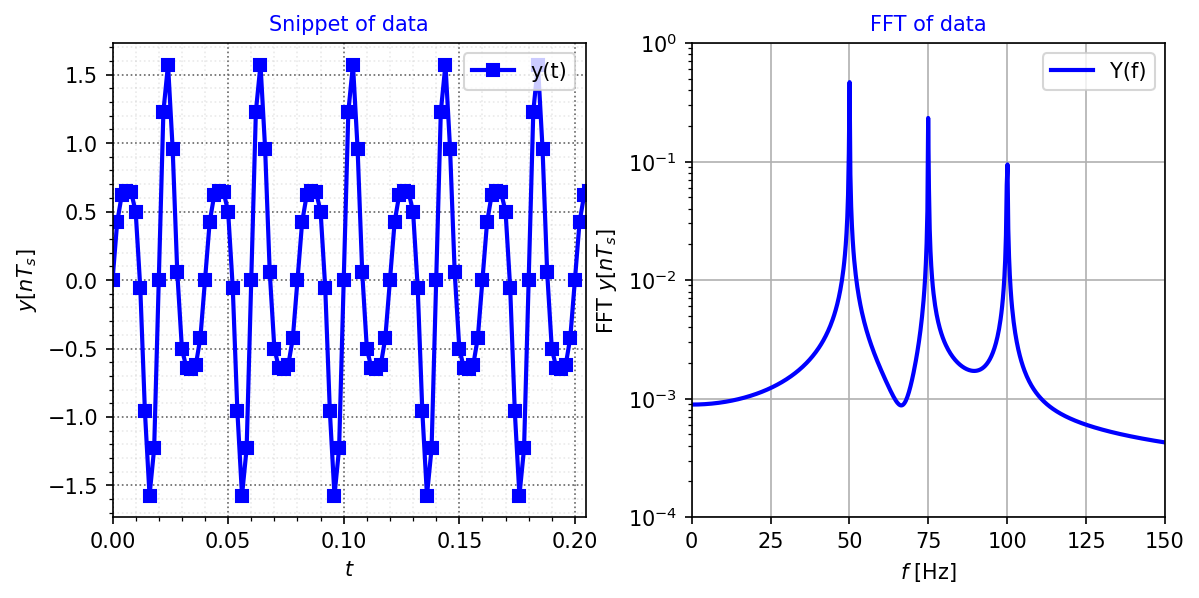

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y,'bs-')
ax1.set_ylabel('$y[nT_s]$')
ax1.set_xlabel('$t$')
ax1.set_xlim([0, max(t)/20])
ax1.legend(['y(t)'])
ax1.set_title('Snippet of data')
nicegrid(ax1)

ax2.semilogy(xf_plot, np.abs(Yf_plot),'b-')
ax2.set_ylabel('FFT $y[nT_s]$')
ax2.set_xlabel('$f$ [Hz]')
ax2.set_xlim([0, 150])
ax2.set_ylim([1e-4, 1])
ax2.legend(['Y(f)'])
ax2.set_title('FFT of data')
plt.show()

## Add a window to the data to reduce leakage

In [5]:
w = blackman(N)
Ywf = fft(y*w)
Ywf_plot = 1.0/N * fftshift(Ywf)

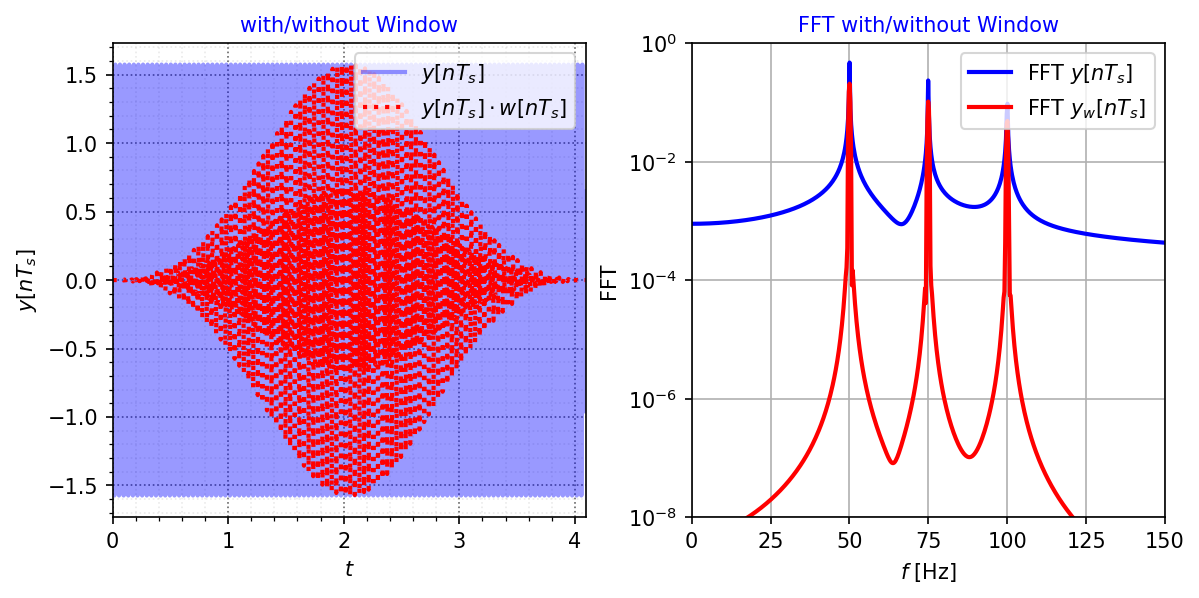

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y,'b-',alpha=0.4)
ax1.plot(t, y*w ,'r:')
ax1.set_ylabel('$y[nT_s]$')
ax1.set_xlabel('$t$')
ax1.legend(['$y[nT_s]$', '$y[nT_s]\cdot w[nT_s]$'])
ax1.set_title('with/without Window')
nicegrid(ax1)

ax2.semilogy(xf_plot, np.abs(Yf_plot), '-b')
ax2.semilogy(xf_plot, np.abs(Ywf_plot), '-r')
ax2.set_ylabel('FFT')
ax2.set_xlabel('$f$ [Hz]')
ax2.set_xlim([0, 150])
ax2.set_ylim([1e-8, 1])
ax2.legend(['FFT $y[nT_s]$', 'FFT $y_w[nT_s]$'])
ax2.set_title('FFT with/without Window')
plt.show()